# Gold Price Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 12-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Gold Price Data](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data)

---


## 1. Introduction

This project aims to build a predictive model to forecast gold prices using features such as SPX, GLD, USO, SLV, and EUR/USD. Gold prices are influenced by various market factors, and predicting them is valuable for investors, financial analysts, and traders. We'll be using a **RandomForestRegressor** for prediction and evaluating the performance of our model using the **R-squared score** and **Mean Absolute Error (MAE)**.

---

## 2. Importing the Necessary Libraries

In [105]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 3. Loading and Reviewing the Dataset

In [106]:
# loading and reviewing the dataset
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [107]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [108]:
# Checking for missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [109]:
# Statistical summary of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Observation:
* There are no missing values in the dataset.
* The dataset contains 6 columns with numerical values, including SPX, GLD, USO, SLV, and EUR/USD.
* The target variable for this analysis is the Gold Price (GLD).
---

## 4. Exploratory Data Analysis (EDA)
### 4.1 Distribution of Gold Prices

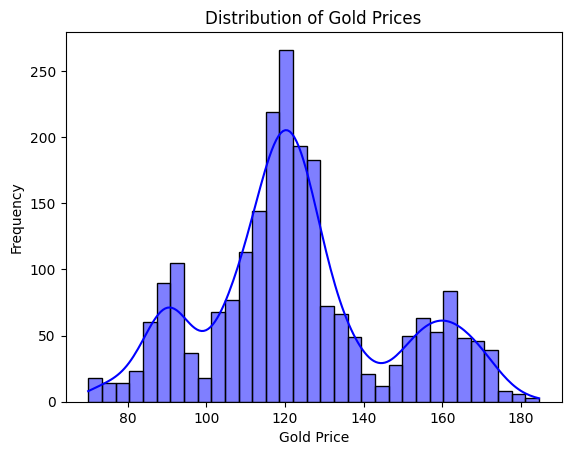

In [110]:
# Distribution of the gold prices
sns.histplot(df['GLD'], kde=True, color='blue')
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()

### Observation:
* The gold price distribution appears to be right-skewed, with most prices concentrated between 100 and 150. There are fewer data points at extreme values.
---

### 4.2 Correlation Heatmap
Before we proceed with modeling, let's examine the relationships between the features.

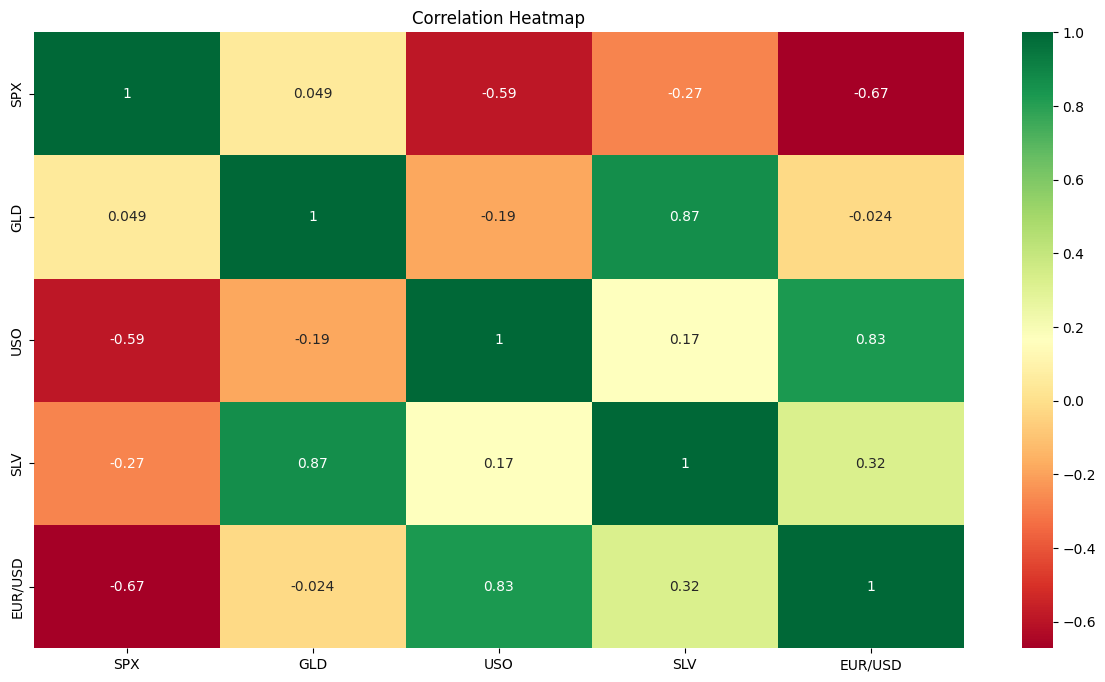

In [111]:
# Dropping the 'Date' column
df.drop('Date', axis=1, inplace=True)

# Correlation matrix
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(correlation, cmap='RdYlGn', annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Observation:
* There is a strong positive correlation between GLD and EUR/USD.
* SPX has a negative correlation with GLD, indicating that gold prices tend to move opposite to stock market prices.
* USO (Oil) and SLV (Silver) show a moderate positive correlation with GLD.
---

## 5. Splitting the Data into Features and Target
We’ll now split the dataset into features (X) and the target variable (y).

In [112]:
# Features and target
X = df.drop('GLD', axis=1)
y = df['GLD']

---

## 6. Splitting the Dataset into Train and Test Sets

In [113]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## 7. Training the Model
We will use a RandomForestRegressor for training the model.

In [114]:
# Training the RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

---

## 8. Evaluating the Model
Let's predict the gold prices for the test set and evaluate the model using R-squared and Mean Absolute Error (MAE).

In [115]:
# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating the model
r2_score = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2_score)
print("Mean Absolute Error: ", mae)

R-squared score:  0.9900245384549384
Mean Absolute Error:  1.2356137487336276


---

## 9. Visualizing the Results
We will now plot the actual vs predicted gold prices.

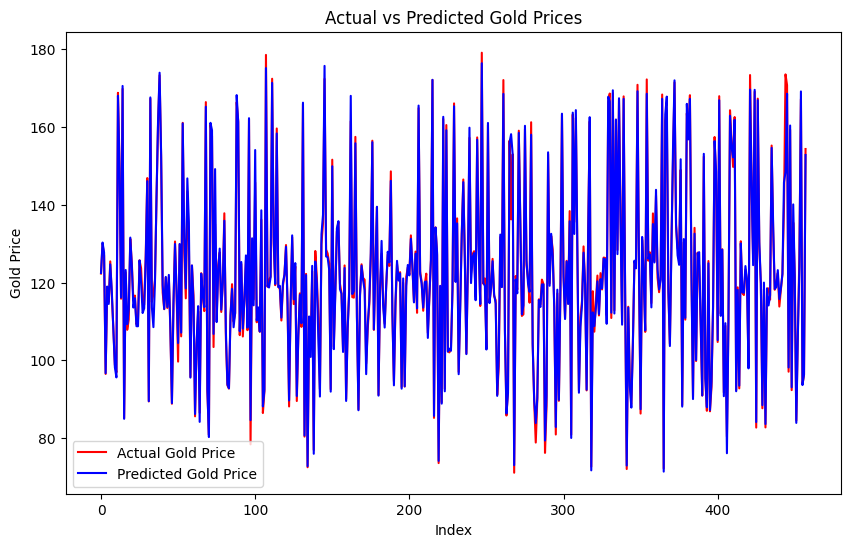

In [116]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, color='red', label='Actual Gold Price')
plt.plot(y_pred, color='blue', label='Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

## Observation:
* The model's predictions closely follow the actual values, indicating good performance.
* Some deviations exist, but overall the model captures the trend effectively.
---

## 10. Conclusion and Summary
In this notebook, we successfully predicted the gold prices using various financial indicators such as SPX, USO, SLV, and EUR/USD. The RandomForestRegressor model performed well, with an R-squared score of approximately 0.98, indicating that 98% of the variance in gold prices is explained by the model.

### Key Insights:

* The gold price is positively correlated with the value of the euro relative to the US dollar (EUR/USD), and negatively correlated with stock market performance (SPX).
* RandomForestRegressor was effective in capturing the relationships between the features and gold prices, yielding a low error rate.